# Instructions

1. Import the necessary libraries.

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

3. First look at its main features (head, shape, info). **NOTE**   The target column is _total_claim_amount_

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

5. Change effective to date column to datetime format.

6. Create a NEW dataframe using only the numerical data called _numerical_df_.  **Use this for the following questions**.

6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

7. Plot a correlation matrix, comment what you see.

8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

9. Comment what you can see in the plots.

10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

11. Did you find outliers? Comment what you will do with them.  If you decide to remove them, do that now. Also, remove them from your **main** dataframe.

12. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

13. Save the numerical_df to csv as numerical.csv   You will use this file again this week.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 3.First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
pd.set_option('display.max_columns', None)
data.head(4)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize


In [4]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [6]:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ','_')
print(data.shape)
data.head()


(9134, 24)


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 5. Change effective to date column to datetime format.

In [7]:
# Convert 'effective_to_date' column to datetime format

data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], format='%m/%d/%y')
data.head()


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 6. Create a NEW dataframe using only the numerical data called numerical_df.

In [8]:
numericals = data.select_dtypes(np.number)

print(numericals.shape)

numericals.head()

(9134, 8)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


# 7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. 
#   Store continuous data into a continuous_df variable and do the same for discrete_df

In [9]:
numericals['months_since_policy_inception'].value_counts(dropna=False)

59    142
61    128
50    125
44    115
3     114
     ... 
16     70
96     67
82     56
98     54
97     52
Name: months_since_policy_inception, Length: 100, dtype: int64

# Summary after discussion : 
# discrete columns : monthly_premium_auto, months_since_last_claim, months_since_policy_inception, number_of_open_complaints, number_of_policies
# continuous columns : income, customer_lifetime_value, total_claim_amount

In [10]:
def separate_numerical_columns(df):
    """
    Separates numerical columns into discrete and continuous based on the given formula.
    Args:
        df (pd.DataFrame): Input dataframe with numerical columns.
    Returns:
        pd.DataFrame, pd.DataFrame: Dataframes containing discrete and continuous columns.
    """
    # Calculate the ratio of unique values to the total number of rows
    unique_ratio = df.nunique() / len(df)
    # Filter columns based on the condition
    continuous_columns = unique_ratio[unique_ratio > 0.05].index
    discrete_columns = unique_ratio[unique_ratio <= 0.05].index
    # Create new dataframes for discrete and continuous columns
    continuous_df = df[continuous_columns]
    discrete_df = df[discrete_columns]
    return continuous_df, discrete_df
# Example usage:
# Assuming 'your_dataframe' is your actual dataframe
continuous_df, discrete_df = separate_numerical_columns(numericals)
# Print the shapes of the resulting dataframes
print(f"Continuous columns shape: {continuous_df.shape}")
print(f"Discrete columns shape: {discrete_df.shape}")

Continuous columns shape: (9134, 3)
Discrete columns shape: (9134, 5)


In [11]:
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [12]:
discrete_df

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


# 8. Plot a correlation matrix, comment what you see.

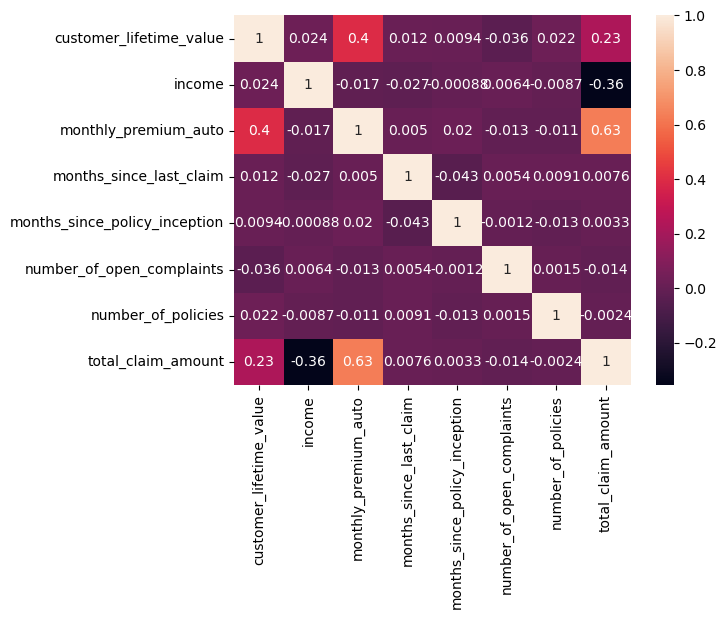

In [13]:
correlations_matrix = numericals.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# 9. Create a function to plot every discrete variable. Do the same with the continuous variables 
#    (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [14]:
import matplotlib.pyplot as plt

def plot_discrete_variables(dataframe):
    for column in discrete_df.columns:
        plt.figure(figsize=(8, 6))
        dataframe[column].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

# Solution from CHATGPT

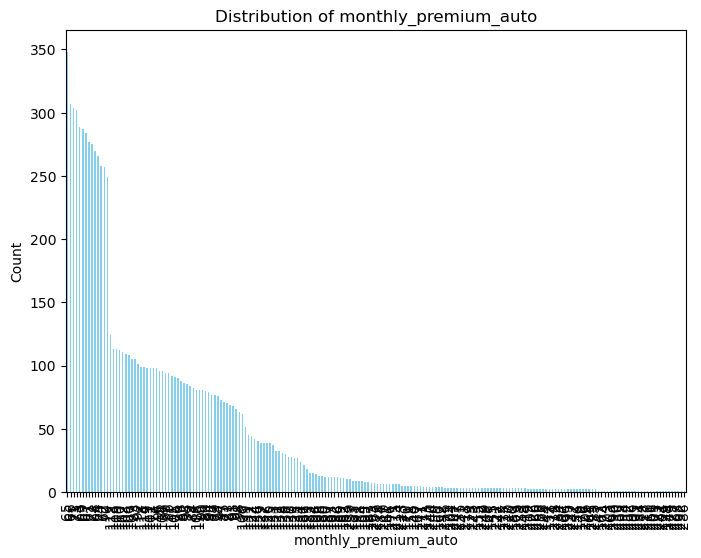

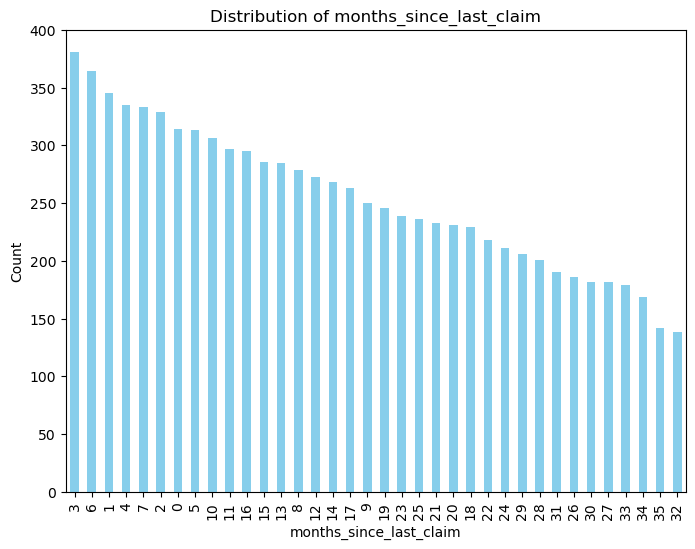

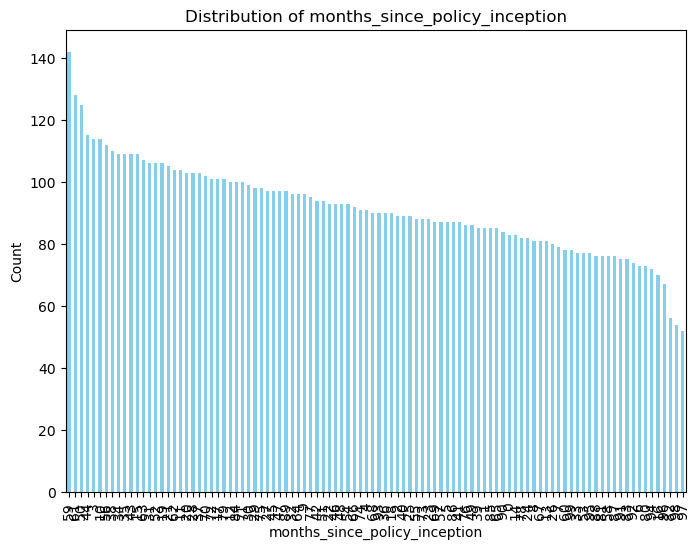

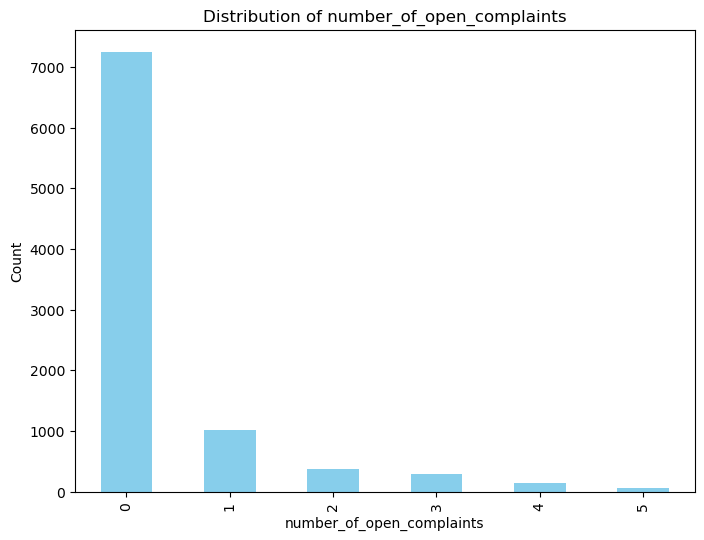

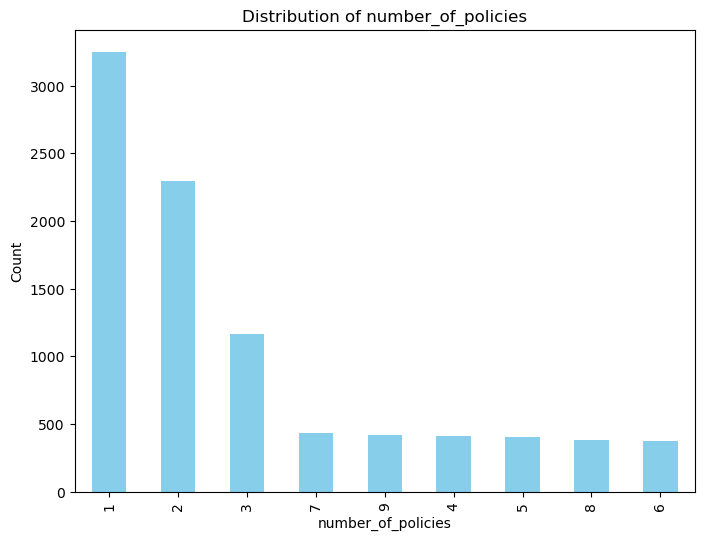

In [15]:
plot_discrete_variables(discrete_df)

In [16]:
def plot_continuous_variables(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(8, 6))
        dataframe[column].plot(kind='hist', color='skyblue', bins=20)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        
# Solution from CHATGPT

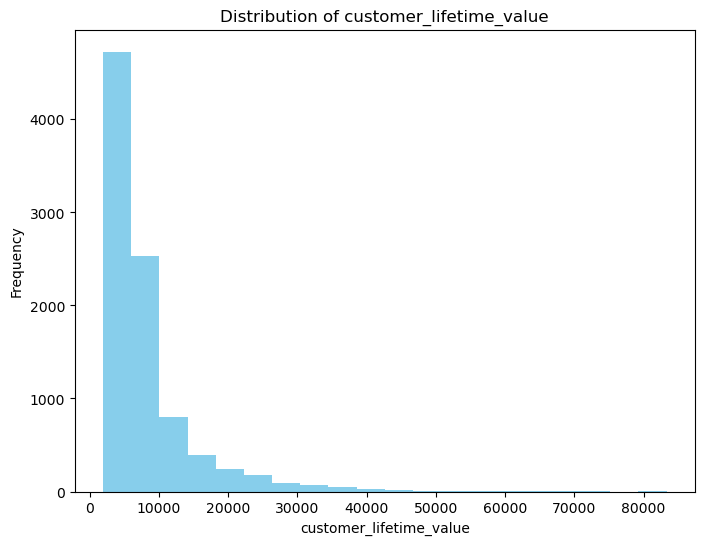

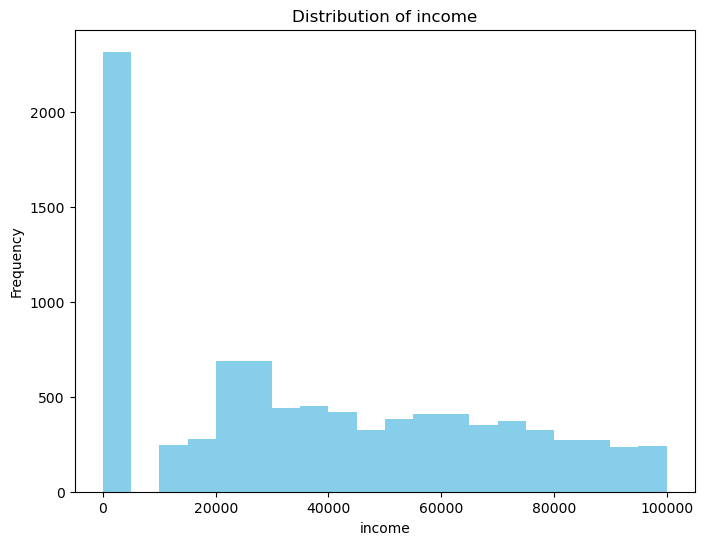

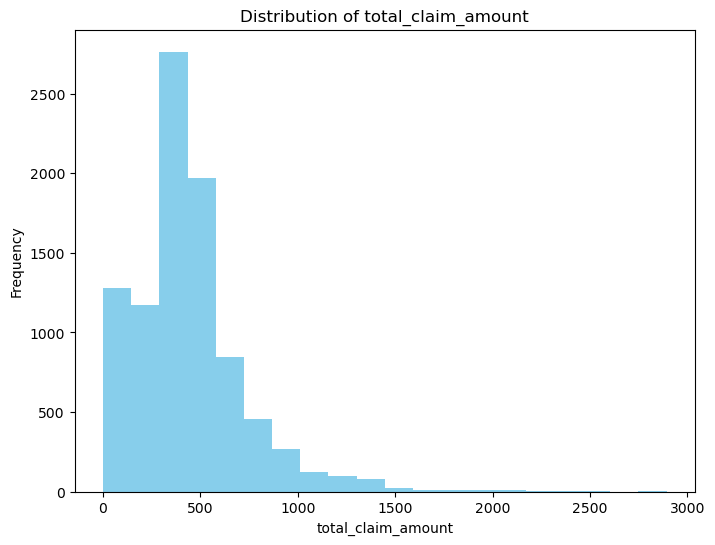

In [17]:
plot_continuous_variables(continuous_df)

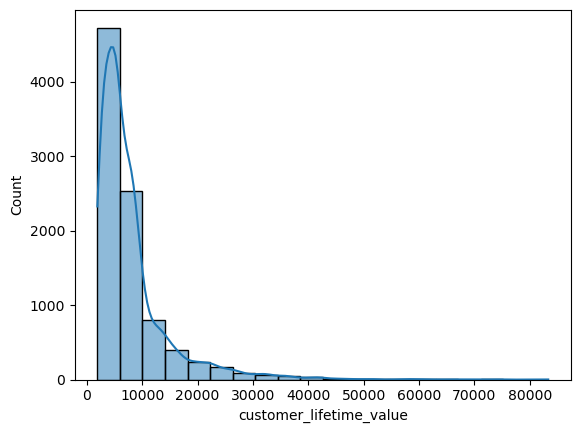

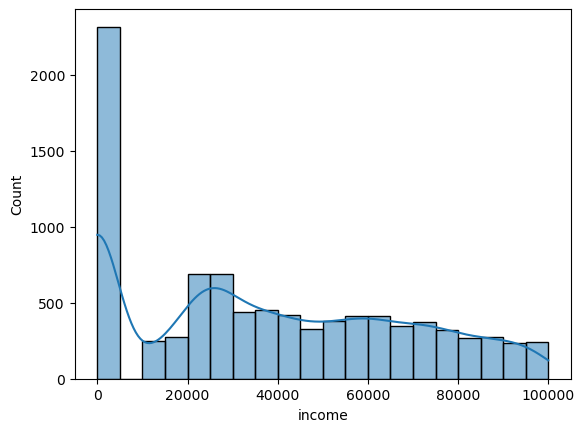

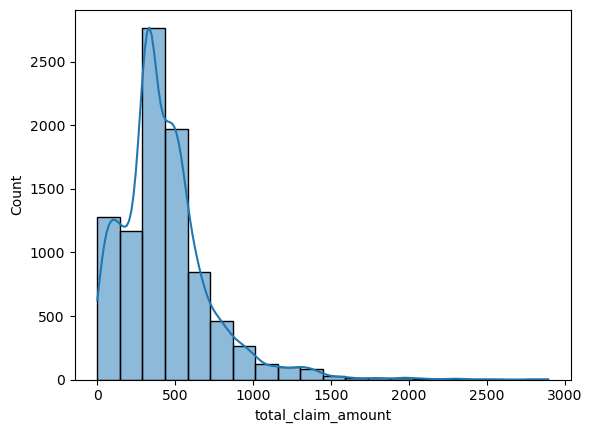

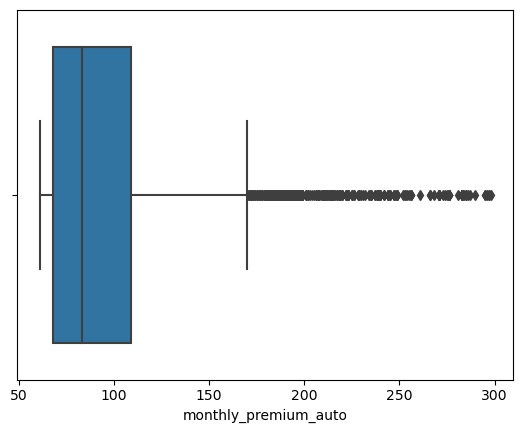

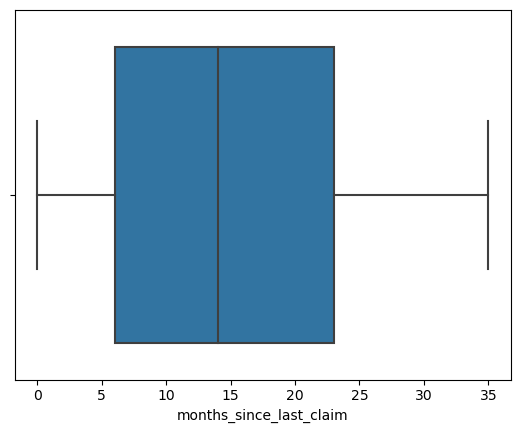

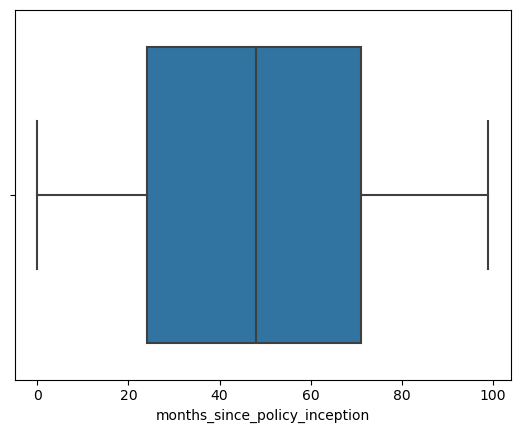

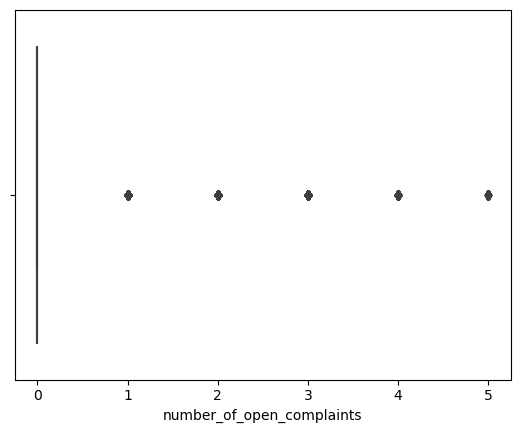

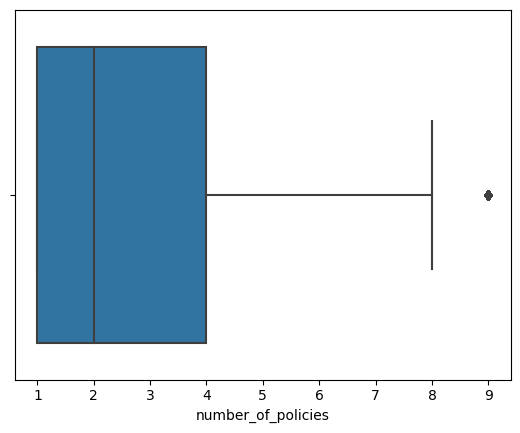

In [18]:
def plots(df):
    for column in continuous_df.columns:
        sns.histplot(x=column, data=continuous_df, bins=20, kde=True)
        plt.show()
    for column in discrete_df.columns:
        sns.boxplot(x=column, data=discrete_df)
        plt.show()
plots(numericals)

# Solution Team

# 10. Comment what you can see in the plots.

# Discrete columns : monthly_premium_auto, months_since_last_claim, months_since_policy_inception, number_of_open_complaints, number_of_policies

In [19]:
# Comment for Discrete Columns : 
# 1. in these discrete columns there is no really outliers so we will not change anything for these discrete

In [20]:
discrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_premium_auto,9134.0,93.219291,34.407967,61.0,68.0,83.0,109.0,298.0
months_since_last_claim,9134.0,15.097000,10.073257,0.0,6.0,14.0,23.0,35.0
months_since_policy_inception,9134.0,48.064594,27.905991,0.0,24.0,48.0,71.0,99.0
number_of_open_complaints,9134.0,0.384388,0.910384,0.0,0.0,0.0,0.0,5.0
number_of_policies,9134.0,2.966170,2.390182,1.0,1.0,2.0,4.0,9.0



# Continuous columns : income, customer_lifetime_value, total_claim_amount

In [21]:
continuous_df.describe()

,customer_lifetime_value,income,total_claim_amount
count,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,434.088794
std,6870.967608,30379.904734,290.500092
min,1898.007675,0.000000,0.099007
25%,3994.251794,0.000000,272.258244
50%,5780.182197,33889.500000,383.945434
75%,8962.167041,62320.000000,547.514839
max,83325.381190,99981.000000,2893.239678


In [22]:
# Comment for Continous Columns : 
# 1. There are clearly some outliers in every column type that we need to deal with it 
# 2. The problem especially in income column that there is 2317 row that Zero 0


In [43]:
# 11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
# 12. Did you find outliers? Comment what you will do with them. 
#   If you decide to remove them, do that now. Also, remove them from your main dataframe.

In [44]:
# Solution : The outliers is not separate as the outliers row is not a lot 

In [ ]:
# 13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.
# Based on the data, there is 2317 row with 0 so we use KNeighborsClassifier to predict the income 

In [23]:
continuous_df['income'].value_counts(dropna=False)

0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

In [24]:
numericals_with_income = numericals[numericals['income']>0]
numericals_with_income

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
2,12887.431650,48767,108,18,38,0,2,566.472247
4,2813.692575,43836,73,12,44,0,1,138.130879
5,8256.297800,62902,69,14,94,0,2,159.383042
6,5380.898636,55350,67,0,13,0,9,321.600000
...,...,...,...,...,...,...,...,...
9127,5032.165498,66367,64,6,48,0,3,307.200000
9128,4100.398533,47761,104,16,58,0,1,541.282007
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000


In [25]:
X_income = numericals_with_income.drop(['income','total_claim_amount'],axis=1)
y_income =  numericals_with_income['income']


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [27]:
X_normalized_income = pd.DataFrame(MinMaxScaler().fit_transform(X_income), columns=X_income.columns)
X_normalized_income

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.007926,0.033898,0.914286,0.050505,0.0,0.000
1,0.132596,0.199153,0.514286,0.383838,0.0,0.125
2,0.008544,0.050847,0.342857,0.444444,0.0,0.000
3,0.075566,0.033898,0.400000,0.949495,0.0,0.125
4,0.040157,0.025424,0.000000,0.131313,0.0,1.000
...,...,...,...,...,...,...
6812,0.035863,0.012712,0.171429,0.484848,0.0,0.250
6813,0.024389,0.182203,0.457143,0.585859,0.0,0.000
6814,0.262126,0.050847,0.514286,0.898990,0.0,0.125
6815,0.012026,0.076271,0.400000,0.282828,0.0,0.000


In [28]:
display(X_normalized_income.shape)
display(y_income.shape)

(6817, 6)

(6817,)

In [29]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_normalized_income,y_income)


KNeighborsClassifier(n_neighbors=3)

In [30]:
KNN.score(X_normalized_income,y_income)

0.4330350594102978

In [31]:
X_all = numericals.drop(['income','total_claim_amount'],axis=1)
X_normalized_all = pd.DataFrame(MinMaxScaler().fit_transform(X_all), columns=X_all.columns)
y_all = numericals['income']

In [32]:
y_all.shape

(9134,)

In [33]:
predicted_income = pd.Series(KNN.predict(X_normalized_all),name='predicted_income')

In [34]:
len(predicted_income)

9134

In [35]:
numericals = pd.concat([numericals,predicted_income],axis=1)
numericals[['income','predicted_income']].head(25)

,income,predicted_income
0,56274,31385
1,0,32818
2,48767,11885
3,0,27804
4,43836,25860
5,62902,62902
6,55350,55350
7,0,24450
8,14072,14072
9,28812,28095


In [36]:
numericals.income.mean()

37657.38000875848

In [37]:
numericals.predicted_income.mean()

33643.39347492884

In [40]:
numericals['final_income'] =  np.where(numericals['income']== 0, numericals['predicted_income'], numericals['income'])
numericals[['income','predicted_income','final_income']].head(25)

,income,predicted_income,final_income
0,56274,31385,56274
1,0,32818,32818
2,48767,11885,48767
3,0,27804,27804
4,43836,25860,43836
5,62902,62902,62902
6,55350,55350,55350
7,0,24450,24450
8,14072,14072,14072
9,28812,28095,28812


In [41]:
numericals['final_income'].mean()

45929.23844974819

In [42]:
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,predicted_income,final_income
0,2763.519279,56274,69,32,5,0,1,384.811147,31385,56274
1,6979.535903,0,94,13,42,0,8,1131.464935,32818,32818
2,12887.431650,48767,108,18,38,0,2,566.472247,11885,48767
3,7645.861827,0,106,18,65,0,7,529.881344,27804,27804
4,2813.692575,43836,73,12,44,0,1,138.130879,25860,43836


In [45]:
# 14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [46]:
numericals.to_csv('data_numericals.csv', index=False)

# CATEGORICAL DATA

In [47]:
# Instructions

# 1.Open the notebook created for Lab-cleaning-numerical-data.

# 2.Find all of the categorical data. Save it in a categorical_df variable.

# 3.Check for NaN values and decide what to do with them, do it now.

# 4.Check all unique values of columns.

# 5.Check dtypes. Do they all make sense as categorical data?

# 6.Does any column contain alpha and numeric data? Decide how to clean it and do it now.

# 7.Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

# 8.Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

# 9.Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

# 10.Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [48]:
categoricals = data.select_dtypes('object')

print(categoricals.shape)

categoricals.head()

(9134, 15)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


# 3.Check for NaN values and decide what to do with them, do it now.

In [51]:
categoricals.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

# There is no NaN data then there is no action

# 4.Check all unique values of columns.

In [53]:
categoricals.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

# 5.Check dtypes. Do they all make sense as categorical data?
# Looks like all data is make sense and there is just deep clean for sevearal columns like vehicle_class an policy

In [49]:
categoricals.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [63]:
categoricals['vehicle_class'].value_counts(dropna=False)

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [66]:
categoricals['vehicle_class'] = categoricals['vehicle_class'].replace({'Sports Car':'Luxury', 'Luxury SUV':'Luxury', 'Luxury Car':'Luxury'})
print(categoricals['vehicle_class'].unique())

['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury']


In [69]:
categoricals['policy_type'].value_counts(dropna=False)

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

# 6.Does any column contain alpha and numeric data? Decide how to clean it and do it now.

# in here customer column is unique data and it will not affected the data so we can drop it. 

In [77]:
categoricals['customer'].value_counts(dropna=False)

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

In [78]:
categoricals_df = categoricals.drop(['customer'],axis=1)
categoricals_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal,Offer3,Branch,Four-Door Car,Large


# 7.Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

# Nothing to be done anymore as the categoricals_df is already clean now.

In [81]:
categoricals['employmentstatus'].value_counts(dropna=False)

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [82]:
categoricals['employmentstatus'] = categoricals['employmentstatus'].replace({'Medical Leave':'Others', 'Disabled':'Others', 'Retired':'Others'})
print(categoricals['employmentstatus'].unique())

['Employed' 'Unemployed' 'Others']


# 8.Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [70]:
categoricals['policy'].value_counts(dropna=False)

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [72]:
categoricals['policy'] = categoricals['policy'].replace({'Personal L3':'Personal', 'Personal L2':'Personal', 'Personal L1':'Personal',
                                                        'Corporate L3':'Corporate', 'Corporate L2':'Corporate', 'Corporate L1':'Corporate',
                                                        'Special L3':'Special', 'Special L2':'Special', 'Special L1':'Special'})
print(categoricals['policy'].unique())

['Corporate' 'Personal' 'Special']


In [75]:
categoricals['policy'].value_counts(dropna=False)

Personal     6788
Corporate    1968
Special       378
Name: policy, dtype: int64

In [76]:
categoricals.pivot_table(index=['policy_type', 'policy'], values = ['gender'],aggfunc = {'gender':'count'}).reset_index()

,policy_type,policy,gender
0,Corporate Auto,Corporate,1968
1,Personal Auto,Personal,6788
2,Special Auto,Special,378


In [83]:
categoricals['employmentstatus'].value_counts(dropna=False)

Employed      5698
Unemployed    2317
Others        1119
Name: employmentstatus, dtype: int64

# 9.Check number of unique values in each column, can they be combined in any way to ease encoding? 
# All data is clean and ready to encoded for categorical_df

In [85]:
categoricals_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal,Offer1,Agent,Four-Door Car,Medsize


# 10.Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [87]:
categoricals_df.to_csv('data_categoricals.csv', index=False)

# Done